## Linear Regression with only one independent variable (one feature) 
## The weights (slope and intercept) are calculated using statistical properties, not gradient descent

In [14]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# function to calculate SSxy
# SSxy is like the covariance between X and Y (without dividing by n)

def ssxy(listx,listy):
    n = len(listx)
    mean_x = np.mean(listx)
    mean_y = np.mean(listy)
    sumxy = 0
    
    for i in range (0,n):
        sumxy = sumxy+ ((listx[i]-mean_x)*(listy[i]-mean_y))
    
    return sumxy


# function to calculate SSxx
# SSxx is like the variance of X (without dividing by n)

def ssxx(listx):
    n=len(listx)
    mean_x = np.mean(listx)
    sumxx=0
    
    for i in range (0,n):
        sumxx = sumxx + ((listx[i]-mean_x)**2)
    
    return sumxx


        
# function to calculate B1_est - the slope

def b1_est(listx,listy):
    return ssxy(listx,listy)/ssxx(listx)


# function to calculate B0_est - the intercept

def b0_est(listx,listy,b1_est):
    return np.mean(listy)-(b1_est*np.mean(listx))



# function to predict based on B1_est and B0_est

def predict(predict_x,b1_est,b0_est):
    m = len(predict_x)
    predict_y = []
    
    for i in range (m):
        predict_y.append(b0_est + b1_est*predict_x[i])
    
    return predict_y
        
    

In [20]:
# some data to train

listx= np.array([1,2,3,4,5,6,7,8,9,10])
listy = np.array([2,2,1,3,14,2,5,15,16,24])

b1_esti = b1_est(listx,listy)
print('The slope is: ', b1_esti)

b0_esti = b0_est(listx,listy,b1_esti)
print('The intercept is: ',b0_esti)

The slope is:  2.1818181818181817
The intercept is:  -3.5999999999999996


In [21]:
# some data to predict

predict_x = np.array([11,12,13,14,15])

predict_y = predict(predict_x,b1_esti,b0_esti)

print(predict_y)


[20.4, 22.58181818181818, 24.76363636363636, 26.945454545454545, 29.127272727272725]


In [22]:
y_test = [18, 23, 22, 29, 35]

RMSE = 0

for i in range (len(y_test)):
    RMSE = RMSE + (y_test[i]-predict_y[i])**2

RMSE = RMSE/len(y_test)

RMSE = np.sqrt(RMSE)

print ("RMSE is: ", RMSE)


RMSE is:  3.233655659717007


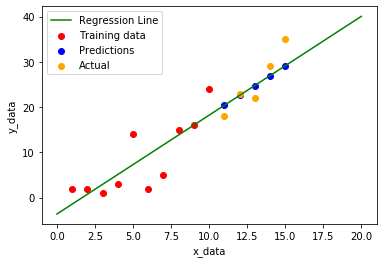

In [23]:
# Plotting

# Plotting Values and Regression Line
max_x = np.max(listx) + 10
min_x = np.min(listx) - 1

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0_esti + b1_esti * x 
 
# Ploting Line
plt.plot(x, y, color="green", label='Regression Line')
# Ploting Scatter Points
plt.scatter(listx, listy, c="red", label='Training data')
plt.scatter(predict_x,predict_y, c="blue", label = 'Predictions')
plt.scatter(predict_x,y_test, c="orange", label = 'Actual')
 
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.legend()
plt.show()

In [ ]:
#### Linear Regression using Gradient Descent #####

# y_pred = b0 + b1*x1 + b2*x2 + ...

# each b coef is calculated at each step as follows: 
# b = b - learning_rate*error*x


In [76]:
# function to predict a value based on input data and coeffiecients

def predict(input_data,coef):
    n=len(coef)
    y_pred = coef[0]
    
    for i in range (n-1):
        y_pred = y_pred + coef[i+1]*input_data[i]
        
    return y_pred


In [89]:
# function to do a gradient descent
# we will need 3 loops:
# one for each epoch
# one for each row in the input_data
# one for each coefficient

def gradient_descent(input_data, learning_rate, n_epochs):
    coef = []
    for i in range (len(input_data[0])):
        coef.append(0.0)
        
    
    for epoch in range (n_epochs):
        sum_error = 0
        
        for row in input_data:
            y_pred = predict(row,coef)
            error = y_pred - row[len(input_data[0])-1]
            sum_error = sum_error + error**2
            
            coef[0] = coef[0] - learning_rate*error
            for i in range (len(coef)-1):
                coef[i+1] = coef[i+1] - learning_rate * error * row[i]
                
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    
    return coef

In [90]:
dataset = [[1, 1, 2], [2, 3, 5], [4, 3, 7], [3, 2, 9], [5, 5, 11]]
l_rate = 0.001
n_epoch = 50
coef = gradient_descent(dataset, l_rate, n_epoch)
print(coef)

>epoch=0, lrate=0.001, error=261.281
>epoch=1, lrate=0.001, error=212.935
>epoch=2, lrate=0.001, error=173.960
>epoch=3, lrate=0.001, error=142.542
>epoch=4, lrate=0.001, error=117.215
>epoch=5, lrate=0.001, error=96.798
>epoch=6, lrate=0.001, error=80.340
>epoch=7, lrate=0.001, error=67.073
>epoch=8, lrate=0.001, error=56.379
>epoch=9, lrate=0.001, error=47.758
>epoch=10, lrate=0.001, error=40.809
>epoch=11, lrate=0.001, error=35.208
>epoch=12, lrate=0.001, error=30.692
>epoch=13, lrate=0.001, error=27.053
>epoch=14, lrate=0.001, error=24.118
>epoch=15, lrate=0.001, error=21.753
>epoch=16, lrate=0.001, error=19.845
>epoch=17, lrate=0.001, error=18.307
>epoch=18, lrate=0.001, error=17.067
>epoch=19, lrate=0.001, error=16.067
>epoch=20, lrate=0.001, error=15.260
>epoch=21, lrate=0.001, error=14.608
>epoch=22, lrate=0.001, error=14.083
>epoch=23, lrate=0.001, error=13.658
>epoch=24, lrate=0.001, error=13.314
>epoch=25, lrate=0.001, error=13.037
>epoch=26, lrate=0.001, error=12.812
>epoch

In [91]:
to_predict = [[7, 3, 1], [9, 2, 5], [4, 2, 1], [2, 3, 4], [11, 12, 12]]

for row in to_predict:
    print(predict(row,coef))

11.692135224171343
13.108369097355135
7.107662992825819
5.691429119642027
25.349137225446192
